<a href="https://colab.research.google.com/github/joaramirezra/Material-Apoyo-Geopython/blob/Documentacion/clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduccion (5)


<center><img src="https://veritasestinputeo.files.wordpress.com/2020/04/jack-nicholson_meta.jpg"
     alt="imagen Geologicsa"
     style="float: left; margin-right: 10px;" 
     width="800" height="600"
     />
</center> 



In [34]:
#@title repaso ( 10 )


In [35]:
!pip install mplstereonet

In [36]:
import mplstereonet as mpl
import matplotlib.pyplot as plt

def graficar_red(*fallas):
  
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111,projection='stereonet')

  for falla in fallas :
    ang_plano,dir_plano,label_falla= falla
    ax.plane(ang_plano,dir_plano,label = label_falla)

  plt.title('Red esterografica ',pad = 30, fontsize = 15)
  plt.grid(1)
  plt.legend()
  plt.show()

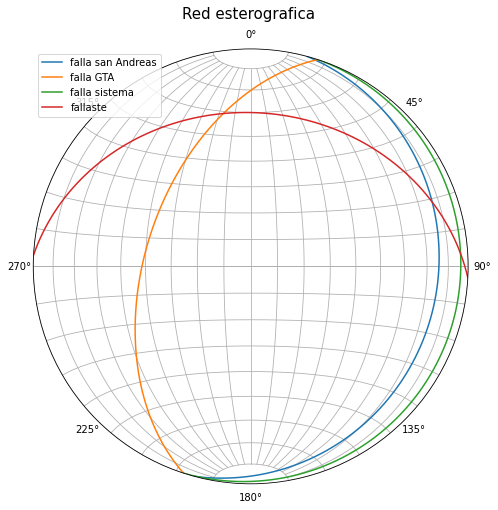

In [37]:
graficar_red([15,15,'falla san Andreas'],[18,130,'falla GTA'],[18,4,'falla sistema'],[93,150,'fallaste'])

# Pandas (5)


<center><img src="https://miro.medium.com/max/666/1*DadyHI0auADUxl5-ft4uSQ.jpeg"
     alt="imagen Geologicsa"
     style="float: left; margin-right: 10px;" 
     width="800" height="600"
     />
</center> 





In [38]:
# importacion 
import pandas as pd

In [39]:
# cargar un data set 
data = pd.read_csv('california_housing_test.csv',sep=',')
data.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [40]:
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589200,1.994936,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,3000.0,35.635390,2.129670,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,3000.0,28.845333,12.555396,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,3000.0,2599.578667,2155.593332,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,3000.0,529.950667,415.654368,2.0000,291.000,437.00000,636.000000,5419.0000
population,3000.0,1402.798667,1030.543012,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,3000.0,489.912000,365.422710,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,3000.0,3.807272,1.854512,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,3000.0,205846.275000,113119.687470,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


In [41]:
data['longitude'].head()

0   -122.05
1   -118.30
2   -117.81
3   -118.36
4   -119.67
Name: longitude, dtype: float64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [43]:
# ---- ejemplo practico 

In [44]:
# Cargamos archivos 

uid = "1r7AYOFEw9RgU0QaagxkHuECvfoegQWp9spQtMV8XJGI"
url = f"https://docs.google.com/spreadsheets/d/{uid}/export?format=csv"
df = pd.read_csv(url)
df.head(5)

,Sample,Lithofacies,Facies Association,Carbonate,Quartz,Matrix,Bioclasts,Authigenic
0,40,5,C,34.3,11.7,0.0,1.0,30.3
1,42,9,D,49.3,6.3,3.7,0.0,17.3
2,43,9,D,15.0,4.7,0.0,40.7,34.0
3,44,9,D,49.0,7.0,0.0,0.0,28.7
4,45,9,D,47.7,8.3,12.3,0.3,19.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sample              51 non-null     int64  
 1   Lithofacies         51 non-null     int64  
 2   Facies Association  51 non-null     object 
 3   Carbonate           51 non-null     float64
 4   Quartz              51 non-null     float64
 5   Matrix              51 non-null     float64
 6   Bioclasts           51 non-null     float64
 7   Authigenic          51 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [51]:
df.groupby('Facies Association').count()

,Sample,Lithofacies,Carbonate,Quartz,Matrix,Bioclasts,Authigenic,C,Q,M
Facies Association,,,,,,,,,,
C,23,23,23,23,23,23,23,23,23,23
D,21,21,21,21,21,21,21,21,21,21
E,7,7,7,7,7,7,7,7,7,7


In [46]:
cols = ['Carbonate', 'Quartz', 'Matrix']

for col in cols:
    df[col[0]] = df[col] * 100 / df[cols].sum(axis=1)

In [47]:
!pip install python-ternary
!pip install plotly_express
import ternary
import pandas as pd

(-5.0, 105.0, -10.0, 90.0)

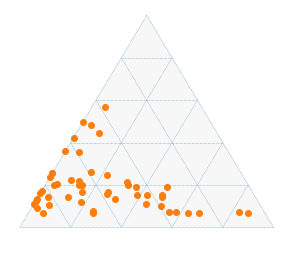

In [48]:
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(5, 4.5)

tax.scatter(df[['M', 'Q', 'C']].values)
tax.gridlines(multiple=20)
tax.get_axes().axis('off')

In [49]:
import plotly_express as px

px.scatter_ternary(df,
                   a="Q", b="C", c="M",
                   color="Facies Association", size="Authigenic",
                   size_max=15,
                   )

# Referencias 

- [diagramas ternarios](https://colab.research.google.com/github/agile-geoscience/xlines/blob/master/notebooks/12_Ternary_diagrams.ipynb#scrollTo=RoiOqT3zkQ_L)
